# Chapter: Time Series Analysis: Concepts and Applications

## Topic: Monitoring Controlled Variables using ARMA

In [1]:
# import packages
import matplotlib.pyplot as plt, numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 14})

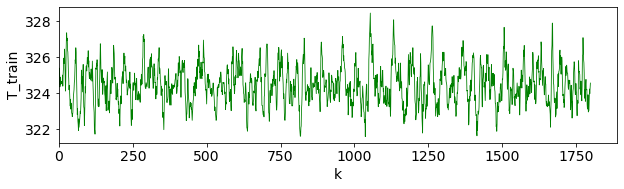

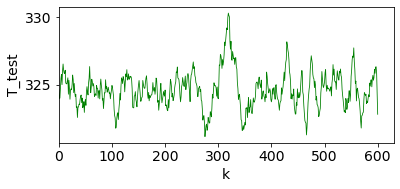

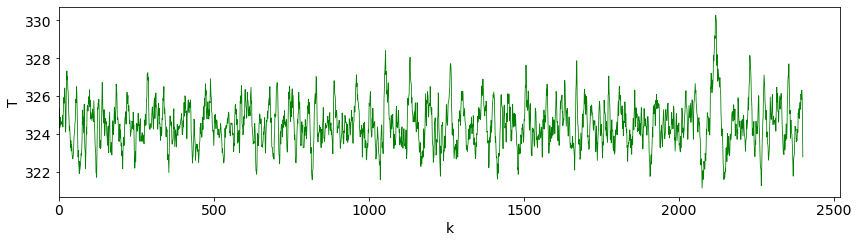

In [2]:
# read data and split into training and test data
T = np.loadtxt('CSTR_controlledTemperature.csv', delimiter=',')
T_train = T[:1800]; T_test = T[1800:]

# plot
plt.figure(figsize=(10,2.5))
plt.plot(T_train, 'g', linewidth=0.8)
plt.ylabel('T_train'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(6,2.5))
plt.plot(T_test, 'g', linewidth=0.8)
plt.ylabel('T_test'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(14,3.5))
plt.plot(T, 'g', linewidth=0.8)
plt.ylabel('T'), plt.xlabel('k'), plt.xlim(0)
plt.show()

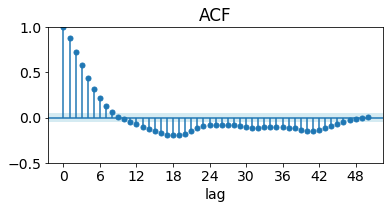

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


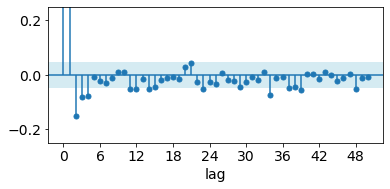

In [3]:
# ACF of T_train
conf_int = 2/np.sqrt(len(T_train))

fig, ax = plt.subplots(1,1,figsize=(6,2.5))
plot_acf(T_train, lags= 50, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim((-0.5, 1)), plt.title('ACF')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(6,2.5))
plot_pacf(T_train, lags= 50, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim((-0.25, 0.25))
plt.show()

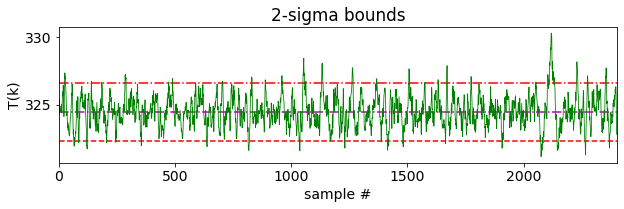

In [5]:
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         mean ± 2*standard deviation bounds
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
mu_T_train = np.mean(T_train)
sigma_T_train = np.std(T_train)

# plot
plt.figure(figsize=(10,2.5))
plt.plot(T, 'g', linewidth=0.8)
plt.hlines(mu_T_train, 0, len(T), colors='m', linestyles='dashdot', label='Mean') 
plt.hlines(mu_T_train+2*sigma_T_train, 0, len(T), colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(mu_T_train-2*sigma_T_train, 0, len(T), colors='r', linestyles='dashed', label='Lower bound') 

plt.xlabel('sample #'), plt.ylabel('T(k)')
plt.xlim((0,len(T)))
plt.title('2-sigma bounds')
plt.show()

In [6]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Fit ARMA model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [7]:
# Determine the optimal AR and MA orders
T_train_centered = T_train - np.mean(T_train); T_test_centered = T_test - np.mean(T_train)
res = arma_order_select_ic(T_train_centered, max_ar=5, max_ma=5, ic=["aic"])
p, r = res.aic_min_order
print('(p, r) = ', res.aic_min_order)

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\f0ne44\AppData\

(p, r) =  (2, 4)


C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
#%% Fit an ARMA(p,r) model
model = ARIMA(T_train_centered, order=(p, 0, r)) # order = (p,d,r)
results = model.fit()

# Print out summary information on the fit
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1800
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -1334.150
Date:                Tue, 16 May 2023   AIC                           2684.299
Time:                        23:01:49   BIC                           2728.264
Sample:                             0   HQIC                          2700.528
                               - 1800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.002      1.245      0.213      -0.002       0.007
ar.L1          1.7979      0.021     86.343      0.000       1.757       1.839
ar.L2         -0.8110      0.021    -39.205      0.0

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Residual analysis
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

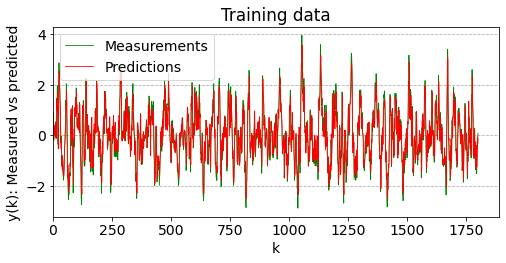

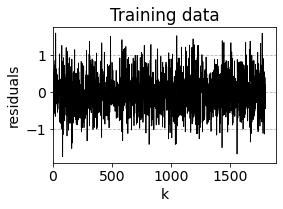

In [9]:
# get model predictions and residuals on training dataset
T_train_centered_pred = results.fittedvalues # same as results.predict()
residuals_train = T_train_centered - T_train_centered_pred # same as results.resid

plt.figure(figsize=(8,3.5)), plt.title('Training data'), plt.plot(T_train_centered, 'g', linewidth=0.8, label='Measurements')
plt.plot(T_train_centered_pred, 'r', linewidth=0.8, label='Predictions')
plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(4,2.5)), plt.plot(residuals_train, 'black', linewidth=0.8)
plt.title('Training data'), plt.ylabel('residuals'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

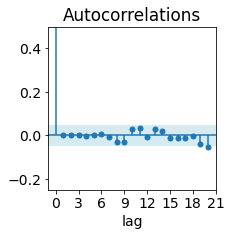

In [10]:
# ACF residuals on training dataset
fig, ax = plt.subplots(1,1,figsize=(3,3))
plot_acf(residuals_train, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim((-0.25, 0.5)), plt.title('Autocorrelations')
plt.show()

In [11]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Predict on Test data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

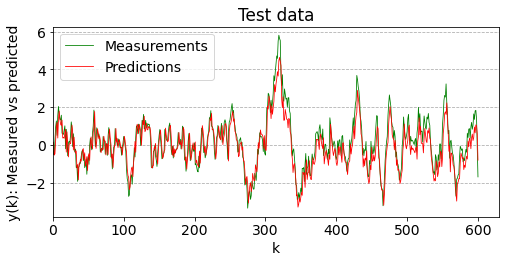

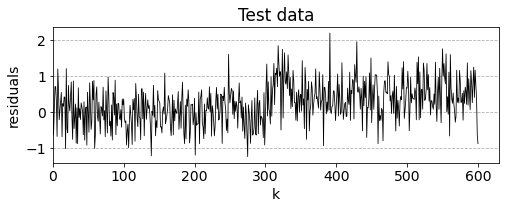

In [12]:
results_test = results.apply(T_test_centered)
T_test_centered_pred = results_test.fittedvalues # same as results_test.predict()
residuals_test = T_test_centered - T_test_centered_pred

plt.figure(figsize=(8,3.5)), plt.title('Test data'), plt.plot(T_test_centered, 'g', linewidth=0.8, label='Measurements')
plt.plot(T_test_centered_pred, 'r', linewidth=0.8, label='Predictions')
plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(8,2.5)), plt.plot(residuals_test, 'black', linewidth=0.8)
plt.title('Test data'), plt.ylabel('residuals'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

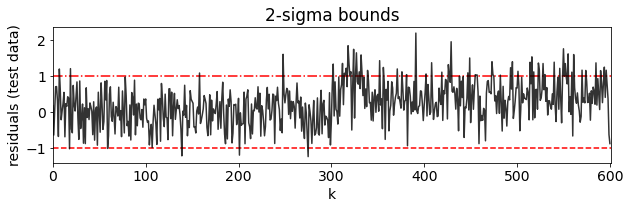

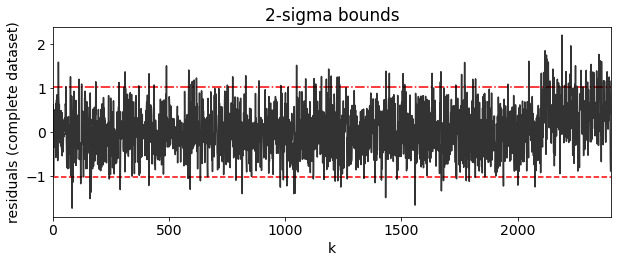

In [14]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         mean +- *standard deviation on residuals
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
mu_residuals_train = np.mean(residuals_train)
sigma_residuals_train = np.std(residuals_train)

# plot
plt.figure(figsize=(10,2.5))
plt.plot(residuals_test, 'black', alpha=0.8, markeredgecolor='k', markeredgewidth=0.1, ms=3)
plt.hlines(mu_residuals_train+2*sigma_residuals_train, 0, len(residuals_test), colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(mu_residuals_train-2*sigma_residuals_train, 0, len(residuals_test), colors='r', linestyles='dashed', label='Lower bound') 
plt.xlabel('k'), plt.ylabel('residuals (test data)')
plt.xlim((0, len(residuals_test)))
plt.title('2-sigma bounds')

# plot
residuals = np.hstack((residuals_train, residuals_test))
plt.figure(figsize=(10,3.5))
plt.plot(residuals, 'black', alpha=0.8, markeredgecolor='k', markeredgewidth=0.1, ms=3)
plt.hlines(mu_residuals_train+2*sigma_residuals_train, 0, len(residuals), colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(mu_residuals_train-2*sigma_residuals_train, 0,  len(residuals), colors='r', linestyles='dashed', label='Lower bound') 
plt.xlabel('k'), plt.ylabel('residuals (complete dataset)')
plt.xlim((0, len(residuals)))
plt.title('2-sigma bounds')
plt.show()